<h2>
    Case: Como reduzir a quantidade de exames necessarios para a classificaçao de um paciente com cancer usando MachineLearning</h2>

<p>Como ja e de conhecimento da comunidade, Um dos principais fatores para o combate ao cancer e o tempo, Nosso problema e que atualmente possuimos um total de 35 exames necessarios para poder realizarmos a classificaçao de um paciente ter ou nao cancer, nesse notebook iremos realizar a analise estatistica de como medir quais variaveis importam mais para o modelo!</p>

<p>Quais vantagens o modelo usar menos features para realizar a classificaçao ?</p>
<ul>
    <li>Menos tempo para realizar o treinamento</li>
    <li>Menos espaço ocupado tanto na memoria, quanto no banco de dados</li>
    <li>Classificaçoes mais rapidas, tendo em vista uma menor quantidade de exames necessarios para a analise</li>
</ul>

In [4]:
x = 24/35
x

0.6857142857142857

In [1]:
# Bibilotecas padrao
import numpy as np
from numpy import random
import pandas as pd

# Data visualzation
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# Base line Model
from sklearn.ensemble import RandomForestClassifier

In [2]:
path = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'

data = pd.read_csv(path, sep=',')
tamanho_original = data.shape[1]
print(f'O dataset original possui: {tamanho_original} features')

O dataset original possui: 35 features


In [3]:
data.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
round(data.diagnostico.value_counts(normalize=True) * 100, 1)

B    62.7
M    37.3
Name: diagnostico, dtype: float64

In [3]:
data.drop('exame_33', axis=1, inplace=True)

In [4]:
x = data.drop(columns=['id', 'diagnostico'])
y = data.diagnostico

y = y.replace({'B':0})
y = y.replace({'M':1})

Accuracy: 94.74000000000001%
Roc_auc_score: 94.6%
Log_loss: 0.14377009074648225


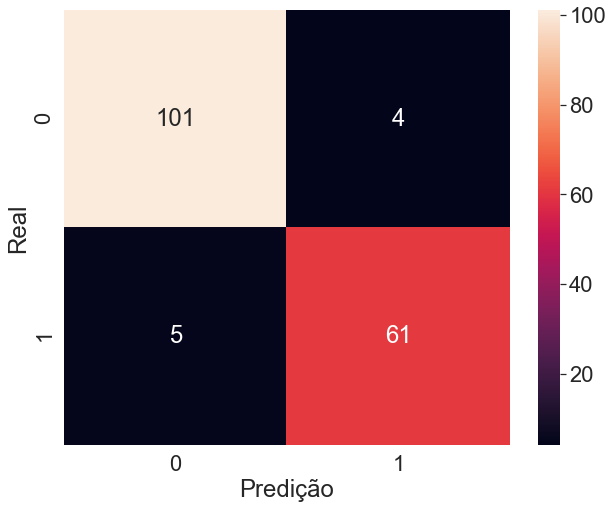

In [5]:
def make_classification(valor):
    
    SEED = 32
    random.seed(SEED)
    
    x_treino, x_teste, y_treino, y_teste = train_test_split(valor, y,
                                                            test_size=0.3)
    
    model = RandomForestClassifier(n_estimators=100, n_jobs=6)
    model.fit(x_treino, y_treino)
    
    preds_ = model.predict_proba(x_teste)[:,1]
    preds = (preds_ > 0.5).astype(int)
    
    logloss = log_loss(y_teste, preds_)
    accuracy = accuracy_score(preds, y_teste)
    rocaucscore = roc_auc_score(preds, y_teste)
     
    print(f'Accuracy: {(round(accuracy,4)*100)}%')
    print(f'Roc_auc_score: {(round(rocaucscore,3)*100)}%')
    print(f'Log_loss: {logloss}')
    
    matriz_confusao = confusion_matrix(y_teste, preds)
    plt.figure(figsize = (10, 8))
    sns.set(font_scale = 2)
    sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")
    pass
        
make_classification(x)

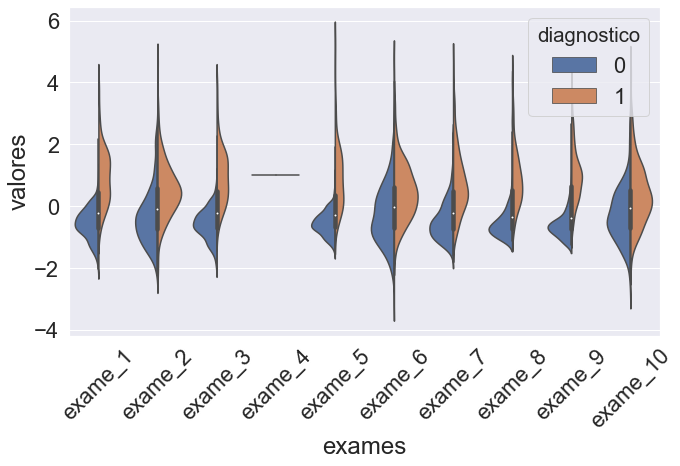

In [6]:
sc = StandardScaler()
sc.fit(x)
x2 = sc.transform(x)
x2 = pd.DataFrame(data=x2, columns=x.keys())

data_plot = pd.concat([y, x2.iloc[:,0:10]], axis=1)
data_plot = pd.melt(data_plot, id_vars='diagnostico',
                    var_name='exames', value_name='valores')

plt.figure(figsize=(10, 7))

sns.violinplot(
      x='exames', y='valores', 
      hue='diagnostico', data= data_plot, 
      split=True
)

plt.xticks(rotation=45)
plt.tight_layout()

In [7]:
x2[['exame_4', 'exame_29']]

,exame_4,exame_29
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
564,1.0,1.0
565,1.0,1.0
566,1.0,1.0
567,1.0,1.0


Accuracy: 95.91%
Roc_auc_score: 95.8%
Log_loss: 0.13296728856321266


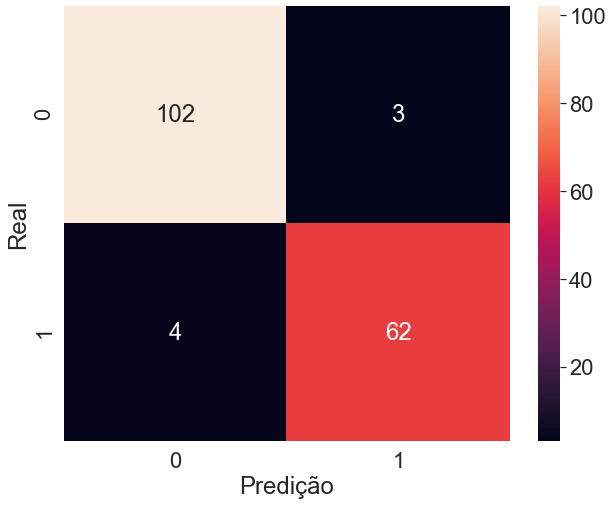

In [8]:
x2 = x.drop(columns=['exame_4', 'exame_29'])
make_classification(x2)

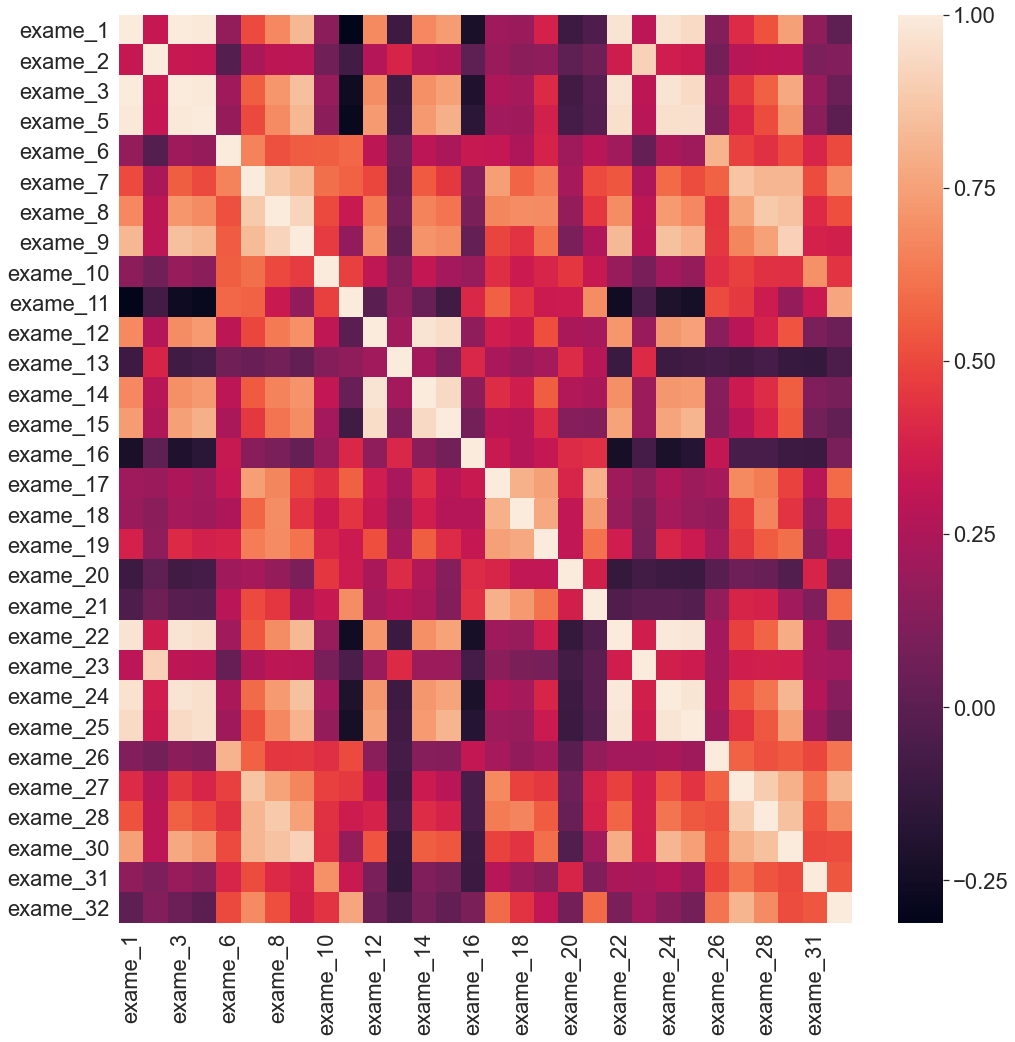

In [9]:
# Drop all variables multi correlated
# usualy boost the performance
corr = x2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()

In [10]:
corr_v1 = corr[corr>0.99]
corr_v2 = corr_v1.sum()
variaveis_correlacionadas = corr_v2[corr_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

********************
===x1===
Media:14.127291739894552
Std:3.5240488262120775
Covariancia:85.29697093226174
Mediana:13.37
Media absoluta:2.7518877567094244
********************
===x2===
Media:91.96903339191564
Std:24.298981038754906
Covariancia:85.29697093226174
Mediana:86.24
Media absoluta:19.032578043680367
********************


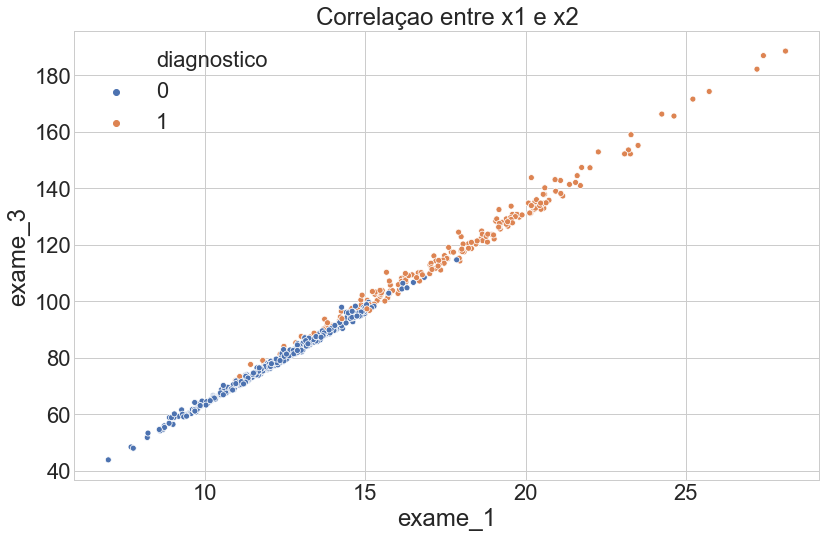

In [14]:
comparacao(x['exame_1'], x['exame_3'])

In [ ]:
# As variaveis exame_3,exame_1, exame_22, exame_24 sao muito correlacionadas, isso e bom?
# Teoricamente, nao, a partir do momento que as duas sao altamente correlacionadas, se nos temos 1 valor por exemplo do exame_1,
# Sabemos +/- qual sera o valor do exame_3, que 

In [13]:
def comparacao(x1, x2):
    # Valores da Primeira coluna
    media_x1 = x1.mean()
    std_x1 = x1.std()
    mediana_x1 = x1.median()
    media_absoluta_x1 = x1.mad()
    covariancia_x1 = np.cov(x1, x2, ddof=0)[0][1]
    
    media_x2 = x2.mean()
    std_x2 = x2.std()
    mediana_x2 = x2.median()
    media_absoluta_x2 = x2.mad()
    covariancia_x2 = np.cov(x2, x1, ddof=0)[0][1]
    
    print('*'*20)
    print('===x1===')
    print(f'Media:{media_x1}')
    print(f'Std:{std_x1}')
    print(f'Covariancia:{covariancia_x1}')
    print(f'Mediana:{mediana_x1}')
    print(f'Media absoluta:{media_absoluta_x1}')
    
    print('*'*20)
    print('===x2===')
    print(f'Media:{media_x2}')
    print(f'Std:{std_x2}')
    print(f'Covariancia:{covariancia_x2}')
    print(f'Mediana:{mediana_x2}')
    print(f'Media absoluta:{media_absoluta_x2}')
    print('*'*20)
    
    # Graffico de corr
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x1, x2, color='blue', hue=y)
    plt.title('Correlaçao entre x1 e x2')
    plt.tight_layout()
    pass

In [15]:
#Selecionando as variaveis que se correlacionam entre Si
corr_v1 = corr[corr>0.99]
corr_v2 = corr_v1.sum()
variaveis_correlacionadas = corr_v2[corr_v2>1]
x3 = x2.drop(columns=variaveis_correlacionadas.keys())
x3 = x2.drop(columns=['exame_3', 'exame_24'])

In [16]:
x3

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.380,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.990,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.570,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.910,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.540,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.004239,25.450,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.002498,23.690,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.003892,18.980,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.006185,25.740,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Accuracy: 95.32000000000001%
Roc_auc_score: 95.1%
Log_loss: 0.1336486010601757


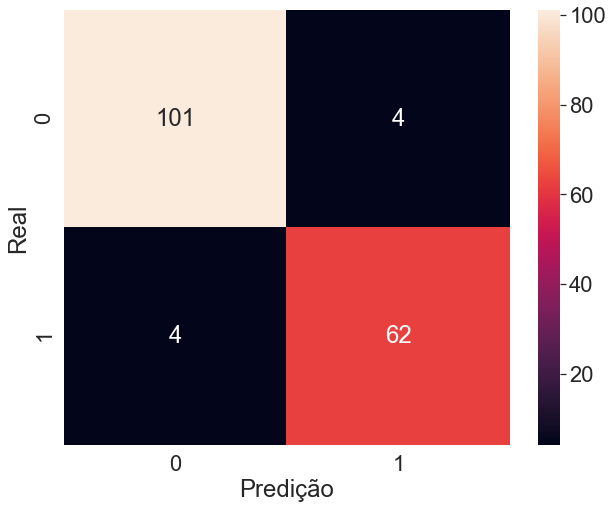

In [17]:
make_classification(x3)

In [27]:
# criando um input de dados novo
x5 = x.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])

SEED = 32
random.seed(SEED)

x_treino, x_teste, y_treino, y_teste = train_test_split(x5, y, test_size=0.3)


selecionar_melhores = SelectKBest(chi2, k=5).fit(x_treino, y_treino)

treino_kbest = selecionar_melhores.transform(x_treino)
teste_kbest = selecionar_melhores.transform(x_teste)

df_melhores_features = pd.DataFrame({
                                     'Feature':list(x_treino.columns),
                                     'Pontuacao':selecionar_melhores.scores_
                                    })
df_melhores_features = df_melhores_features.sort_values(by='Pontuacao', ascending=False)
df_melhores_features.head(5)

,Feature,Pontuacao
21,exame_25,80935.190473
2,exame_5,40089.200232
12,exame_15,6586.187937
19,exame_22,353.218948
11,exame_14,197.296167


Accuracy: 90.06%
Roc_auc_score: 90.4%
Log_loss: 0.43020077625942615


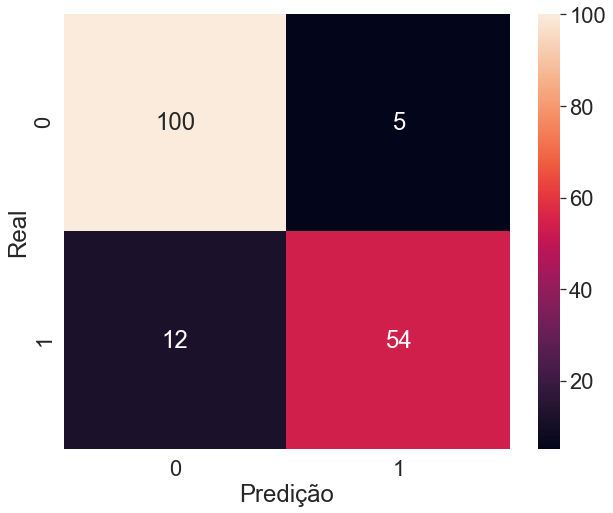

In [22]:
make_classification(x[['exame_25', 'exame_5', 'exame_15', 'exame_22', 'exame_14']])

In [136]:
selecionar_melhores.get_support(indices=True)

array([ 0,  2, 12, 19, 21], dtype=int64)

Accuracy: 95.89999999999999%
Roc_auc_score: 95.81%
Log_loss: 0.12596195419633605


[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

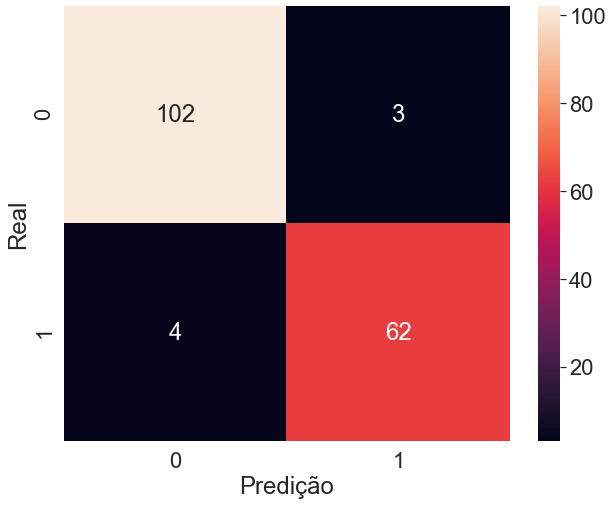

In [41]:
# Recursive Feature Elimination (RFE)
# Porque usar o Rfe?
# * O rfe e um selecionador de features muito poderoso e muito simples
SEED = 32
random.seed(SEED)
    

x_treino, x_teste, y_treino, y_teste = train_test_split(x5, y,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select=15, step = 1)
selecionador_rfe.fit(x_treino, y_treino)
treino_rfe = selecionador_rfe.transform(x_treino)
teste_rfe = selecionador_rfe.transform(x_teste)
classificador.fit(treino_rfe, y_treino)


preds_ = classificador.predict_proba(teste_rfe)[:,1]
preds = (preds_ > 0.5).astype(int)
    
logloss = log_loss(y_teste, preds_)
accuracy = accuracy_score(preds, y_teste)
rocaucscore = roc_auc_score(preds, y_teste)
     
print(f'Accuracy: {(round(accuracy,3)*100)}%')
print(f'Roc_auc_score: {(round(rocaucscore,4)*100)}%')
print(f'Log_loss: {logloss}')
    
matriz_confusao = confusion_matrix(y_teste, preds)
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

In [42]:
melhores_features_ = x_treino.columns[selecionador_rfe.support_]
melhores_features_

Index(['exame_1', 'exame_2', 'exame_5', 'exame_8', 'exame_9', 'exame_14',
       'exame_15', 'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27',
       'exame_28', 'exame_30', 'exame_32'],
      dtype='object')

In [ ]:
# Um exemplo do poder de Rfe, selecionando apenas 5 features, obteve um resultado melhor

Accuracy: 98.2%
Roc_auc_score: 97.97%
Log_loss: 0.09998661811311235


[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

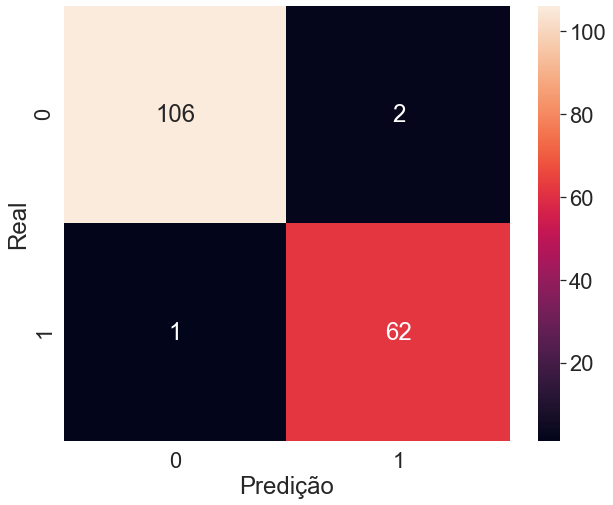

In [174]:
SEED = 12343
random.seed(SEED)

x_treino, x_teste, y_treino, y_teste = train_test_split(x5, y,
                                                       test_size=0.3,
                                                       random_state=0)

classificador = RandomForestClassifier(n_estimators=100, random_state = 12343)

selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(x_treino, y_treino)
treino_rfecv = selecionador_rfecv.transform(x_treino)
teste_rfecv = selecionador_rfecv.transform(x_teste)
classificador.fit(treino_rfecv, y_treino)

preds_ = classificador.predict_proba(teste_rfecv)[:,1]
preds = (preds_ > 0.5).astype(int)
    
logloss = log_loss(y_teste, preds_)
accuracy = accuracy_score(preds, y_teste)
rocaucscore = roc_auc_score(preds, y_teste)

print(f'Accuracy: {(round(accuracy,3)*100)}%')
print(f'Roc_auc_score: {(round(rocaucscore,4)*100)}%')
print(f'Log_loss: {logloss}')

matriz_confusao = confusion_matrix(y_teste, preds)
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

In [176]:
melhores_features = treino_x.columns[selecionador_rfecv.support_]
treino_x3 = treino_x[melhores_features]
print(len(treino_x3.columns))
print(treino_x3.columns)

24
Index(['exame_1', 'exame_2', 'exame_5', 'exame_7', 'exame_8', 'exame_9',
       'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15', 'exame_17',
       'exame_18', 'exame_20', 'exame_21', 'exame_22', 'exame_23', 'exame_25',
       'exame_26', 'exame_27', 'exame_28', 'exame_30', 'exame_31', 'exame_32'],
      dtype='object')


In [109]:
x6 = x[['exame_1', 'exame_2', 'exame_5', 'exame_7', 'exame_8', 'exame_9',
       'exame_12', 'exame_14', 'exame_15', 'exame_18', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31']]

make_classification(x6)

Accuracy: 96.0%
Log_loss: 0.09820321210955005


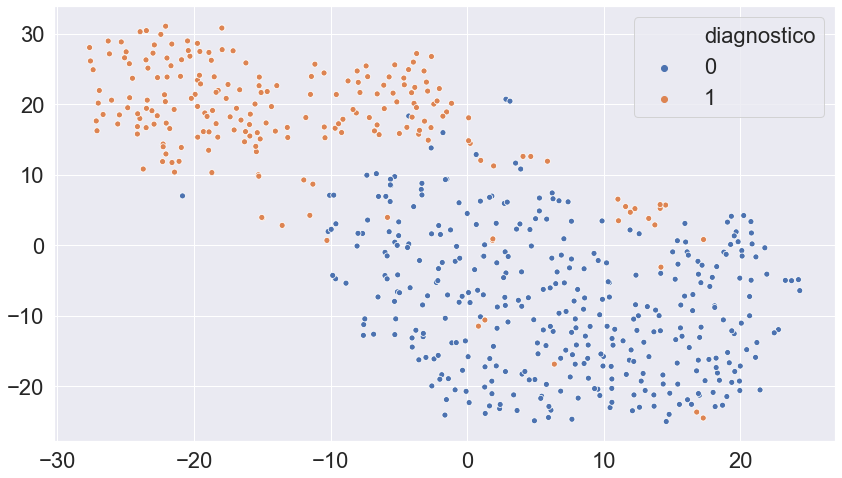

In [116]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
x7 = tsne.fit_transform(x4)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = x7[:,0], y = x7[:,1], hue = y)